In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [7]:
df=pd.read_csv("C:\\Users\\Expert\\Downloads\\housing.csv.csv")

In [8]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [10]:
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV         int64
dtype: object

In [11]:
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
484    False
485    False
486    False
487    False
488    False
Length: 489, dtype: bool

In [13]:
df.shape

(489, 4)

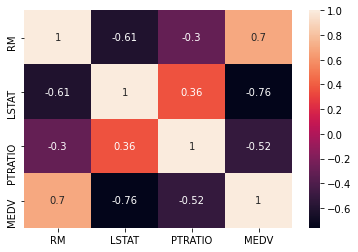

In [14]:
sns.heatmap(df.corr(),annot=True)

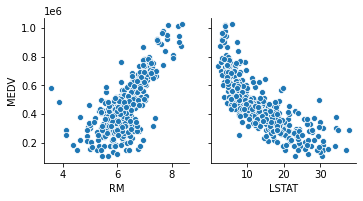

In [15]:
sns.pairplot(x_vars=["RM","LSTAT"],y_vars=["MEDV"],data=df)

In [16]:
x=df.drop(columns=["MEDV","PTRATIO"])
y=df["MEDV"]

In [17]:
from sklearn.model_selection import train_test_split


In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=(0.2),random_state=0)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [20]:
ypred=model.predict(xtest)

In [21]:
ypred

array([476216.33103272, 587153.07950837, 193442.88723242, 416587.50964769,
       523765.14676232, 380210.88780123, 115901.05173557, 445137.45496029,
       467397.87639288, 416565.13564051, 333779.74573252, 380371.5273962 ,
       504956.30140163,  23712.36692555, 543334.72925268, 351660.27397165,
       469372.69199653, 550975.18649254, 373165.77219854, 607372.44239377,
       572567.11717075, 645938.95819672, -20768.13114734, 473651.88243536,
       364287.24121461, 710662.63808736, 619162.6335395 , 706205.15572065,
       462428.45548621, 433502.4763843 , 396186.40174758, 384750.04672173,
       488866.48291431, 626925.39374369, 460249.09712797, 779662.1606105 ,
       495652.79334227, 265900.43404515, 512425.75978602, 569810.91697368,
       334561.20138319, 365240.36423772, 421431.42189818, 510333.36289232,
       267893.96000814, 391312.18812379, 519729.47000244, 380305.56607089,
       758451.1617336 , 416276.45021449, 629158.45128558, 449358.85883492,
       580890.79342429, 4

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [23]:
mse=mean_squared_error(ytest,ypred)

In [24]:
mse

11479476853.820759

In [25]:
mae=mean_absolute_error(ytest,ypred)

In [26]:
mae

79890.01912206096

In [27]:
r2_score(ytest,ypred)

0.5957692986235191

In [28]:
rmse=np.sqrt(mse)

In [29]:
rmse

107142.32055458179

In [30]:
#scaling the data and then result on training and testing data

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(xtrain)
mm_xtrain=mm.transform(xtrain)
mm_xtest=mm.transform(xtest)

In [35]:
model=LinearRegression()
model.fit(mm_xtrain,ytrain)

LinearRegression()

In [36]:
mm_ypred=model.predict(mm_xtest)

In [37]:
mse=mean_squared_error(ytest,mm_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,mm_ypred)
print("MAE:",mae)
score=r2_score(ytest,mm_ypred)
print("R-squared :",score)

MSE: 11479476853.820751
RMSE: 107142.32055458175
MAE: 79890.01912206096
R-squared : 0.5957692986235193


#Polynomial Regression


In [39]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=5)
poly_xtrain=pf.fit_transform(xtrain)
poly_xtest=pf.fit_transform(xtest)

In [40]:
poly_xtrain

array([[1.00000000e+00, 6.20900000e+00, 1.32200000e+01, ...,
        8.90712783e+04, 1.89647657e+05, 4.03791596e+05],
       [1.00000000e+00, 5.42700000e+00, 1.81400000e+01, ...,
        1.75805109e+05, 5.87636756e+05, 1.96420320e+06],
       [1.00000000e+00, 5.34900000e+00, 1.97700000e+01, ...,
        2.21088017e+05, 8.17145278e+05, 3.02018361e+06],
       ...,
       [1.00000000e+00, 6.02100000e+00, 1.03000000e+01, ...,
        3.96140211e+04, 6.77668855e+04, 1.15927407e+05],
       [1.00000000e+00, 6.03000000e+00, 1.88000000e+01, ...,
        2.41606254e+05, 7.53266597e+05, 2.34849287e+06],
       [1.00000000e+00, 6.02000000e+00, 1.01100000e+01, ...,
        3.74495367e+04, 6.28928266e+04, 1.05622338e+05]])

In [41]:
poly_xtest

array([[1.00000000e+00, 5.83400000e+00, 8.47000000e+00, ...,
        2.06815498e+04, 3.00261788e+04, 4.35930295e+04],
       [1.00000000e+00, 6.84200000e+00, 6.90000000e+00, ...,
        1.53784800e+04, 1.55088442e+04, 1.56403135e+04],
       [1.00000000e+00, 5.40300000e+00, 2.68200000e+01, ...,
        5.63178745e+05, 2.79556801e+06, 1.38769450e+07],
       ...,
       [1.00000000e+00, 6.12200000e+00, 5.98000000e+00, ...,
        8.01475410e+03, 7.82885161e+03, 7.64726112e+03],
       [1.00000000e+00, 6.12000000e+00, 9.08000000e+00, ...,
        2.80388624e+04, 4.16001423e+04, 6.17204726e+04],
       [1.00000000e+00, 6.54600000e+00, 5.33000000e+00, ...,
        6.48834044e+03, 5.28305141e+03, 4.30165964e+03]])

In [42]:
model=LinearRegression()
model.fit(poly_xtrain,ytrain)

LinearRegression()

In [43]:
pf_ypred=model.predict(poly_xtest)

In [44]:
pf_ypred

array([435117.57395379, 597885.19808544, 261937.85342701, 272192.09204911,
       498341.68799318, 291569.81559815, 224861.28184979, 426489.35924859,
       446055.6119542 , 407802.86510091, 266729.50863649, 380527.31066994,
       459321.39449303, 215135.72924137, 530479.50294767, 356067.74769829,
       442941.5250095 , 528786.42880319, 375620.79248463, 613130.16632189,
       598009.60857983, 716073.11557154, 180065.13310187, 437334.06648441,
       389593.37571226, 873917.36242972, 695349.15880083, 864452.15666597,
       424263.15201263, 420981.49127547, 301688.80381863, 379475.77804856,
       463815.81631373, 664290.84982775, 435150.63167335, 926598.95159684,
       465668.22987865, 282778.5525092 , 486538.50695686, 530325.71947758,
       272123.19342463, 276379.92831717, 422479.92081054, 481668.11808963,
       300622.65222241, 396237.32809712, 494705.36692654, 329602.32031985,
       949630.48544459, 410819.44826587, 670522.87239079, 435948.94410495,
       574635.47421415, 3

In [45]:
mse=mean_squared_error(ytest,pf_ypred)
print("MSE:",mse)
print("RMSE:",np.sqrt(mse))
mae=mean_absolute_error(ytest,pf_ypred)
print("MAE:",mae)
score=r2_score(ytest,pf_ypred)
print("R-squared :",score)

MSE: 6170743784.095846
RMSE: 78554.08190600821
MAE: 56722.50390100829
R-squared : 0.7827075118820069


#PREDICTING THE HOUSE PRICE

In [53]:
x=df.drop(columns=["MEDV","PTRATIO"])
y=df["MEDV"]

In [54]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [55]:
xtrain.head()

,RM,LSTAT
447,6.209,13.22
457,5.427,18.14
386,5.349,19.77
361,6.380,23.69
221,6.552,3.76


In [56]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [57]:
ypred=model.predict(xtest)

In [60]:
ypred

array([476216.33103272, 587153.07950837, 193442.88723242, 416587.50964769,
       523765.14676232, 380210.88780123, 115901.05173557, 445137.45496029,
       467397.87639288, 416565.13564051, 333779.74573252, 380371.5273962 ,
       504956.30140163,  23712.36692555, 543334.72925268, 351660.27397165,
       469372.69199653, 550975.18649254, 373165.77219854, 607372.44239377,
       572567.11717075, 645938.95819672, -20768.13114734, 473651.88243536,
       364287.24121461, 710662.63808736, 619162.6335395 , 706205.15572065,
       462428.45548621, 433502.4763843 , 396186.40174758, 384750.04672173,
       488866.48291431, 626925.39374369, 460249.09712797, 779662.1606105 ,
       495652.79334227, 265900.43404515, 512425.75978602, 569810.91697368,
       334561.20138319, 365240.36423772, 421431.42189818, 510333.36289232,
       267893.96000814, 391312.18812379, 519729.47000244, 380305.56607089,
       758451.1617336 , 416276.45021449, 629158.45128558, 449358.85883492,
       580890.79342429, 4